### RGB a HSV


$$R = \frac{R}{255} $$

$$G = \frac{G}{255}$$

$$B = \frac{B}{255}$$



Cálculo del Value:

<center>
<figure>
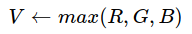 
</figure>
</center>




Cálculo de la Saturación:


<center>
<figure>
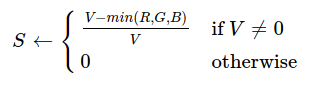 
</figure>
</center>

 

Cálculo del Hue:

<center>
<figure>
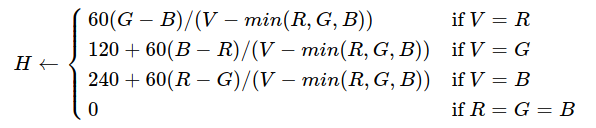 
</figure>
</center>

$$ H = H + 360 \ \ \ \text{if} \ H < 0$$

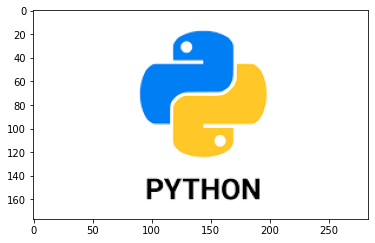

In [51]:
#Paquetes útiles
import numpy as np
import cv2
import matplotlib.pyplot as plt

rute="/content/img.png" #Ruta de la imagen
img=cv2.imread(rute) #Leo la imagen
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Llevo la imagem del espaacio de color BGR a RGB
plt.imshow(img) #Gráfico la imagen

In [52]:
def RGB_HSV(img):
  """Función que recibe una imagen en el espacio de color RGB y retorna la misma imagen en el espacio de color HSV.
  -----------------------------------------------------------------------------------------------------------------
  -----------------------------------------------------------------------------------------------------------------
  Parámetros de entrada: 
  img(ndarray):Tensor de la imagen en el espacio de color RGB
  -----------------------------------------------------------------------------------------------------------------
  -----------------------------------------------------------------------------------------------------------------
  Parámetros de salida:
  img_HSV(ndarray):Tensor de la imagen en el espacio de color HSV
  """

  #Normalizamos los 3 canales RGB:
  R=img[...,0]/255
  R 
  G=img[...,1]/255
  G
  B=img[...,2]/255
  B

  h=img.shape[0] #HIGH
  w=img.shape[1] #width

  #Valor(V):
  V=np.zeros((h,w))
  for i in range(h):
    for j in range(w):
      V[i,j]=np.max([R[i,j],G[i,j],B[i,j]])

  #min(R,G,B):
  min_RGB=np.zeros((h,w))
  for i in range(h):
    for j in range(w):
      min_RGB[i,j]=np.min([R[i,j],G[i,j],B[i,j]])


  #S:
  cero=np.where(V==0)
  no_cero=np.where(V!=0)
  S=np.zeros((h,w))
  S[cero]=0
  S[no_cero]=(V[no_cero]-min_RGB[no_cero])/V[no_cero]

  #H:
  H=np.zeros((h,w))
  V_R=np.where(V==R)
  V_G=np.where(V==G)
  V_B=np.where(V==B)
  H[V_R]=60*(G[V_R]-B[V_R])-min_RGB[V_R]
  H[V_G]=120+(60*(B[V_G]-R[V_G]))/(V[V_G]-min_RGB[V_G])
  H[V_B]=240+(60*(R[V_B]-G[V_B]))/(V[V_B]-min_RGB[V_B])
  menor_tre=np.where(H<360)
  H[menor_tre]=H[menor_tre]+360

  #Imagen en HSV:
  img_HSV=np.zeros((h,w,3))
  img_HSV[...,0]=H
  img_HSV[...,1]=S
  img_HSV[...,2]=V
  return img_HSV

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


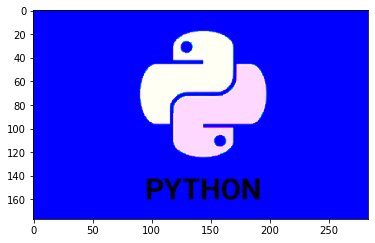

In [53]:
#Probando la función:
img_hsv=RGB_HSV(img)
plt.imshow(img_hsv)

#Espacio de color CMYK (cyan, magneta, yellow y key):
Como su nombre lo indica, tiene 4 canales: cyan, magneta, yellow y key. Combinando apropiadamente estos 4 canales, puedo obtener infinidad de colores diferentes.

Este espacio de color se basa en la sustracción del blanco usando los colores primarios cian, magenta y amarillo y el key o negro aporta el cuerpo, la fuerza, acentúa rasgos o da profundidad a la impresión.

El espacio de color CMYK se utiliza para impresión; ya que se basa en espacio de color sustractivo, es decir, a medida que sumo los colores, va a dar más negro.

Mientras qu el espacio de color RGB no se utiliza para impresión; ya que se basa en espacio de color adictivo, es decir, a medida que sumo los colores, va a dar más blanco y las impresiones se dan en hojas en blanco.



<center>
<figure>
<img src='http://arkiplot.com/arkiplotblog/wp-content/uploads/2014/11/Goethe-ruedacolor-287x300.gif' width="800"> 
<figcaption><a href="http://arkiplot.com/arkiplotblog/wp-content/uploads/2014/11/Goethe-ruedacolor-287x300.gif">CMYK</a></figcaption>
</figure>
</center>

<center>
<figure>
<img src='http://arkiplot.com/arkiplotblog/wp-content/uploads/2014/11/rueda-CMYK.gif' width="800"> 
<figcaption><a href="http://arkiplot.com/arkiplotblog/wp-content/uploads/2014/11/rueda-CMYK.gif">CMYK</a></figcaption>
</figure>
</center>